# BE 521: Final Project Part 1
Spring 2022

Adapted by Kevin Xie

32 Points

Objective: Predict finger movements from ECoG Recordings

Due: March 31st


# Project Overview

This final project involves predicting finger flexion using intracranial EEG (ECoG) in three human subjects. The data and problem framing come from the 4th BCI Competition (Miller et al. 2008). For the details of the problem, experimental protocol, data, and evaluation, please see the original 4th BCI Competition documentation (included as separate document). The remainder of the current document details your deliverables for part 1 of the project.


## Important Deadlines
* Final Project Part 1
 * Due: March 31st
 * 32 Points
* Team Registration
 * Due: March 31st
 * 5 Points
* Checkpoint 1
 * Due: April 14th
 * 20 Points
* Checkpoint 2
 * Due: April 21st
 * 15 Points
* End of competition, submit algorithm (Canvas): 
 * Due: April 25th
 * 15 Points
* Final Report
 * Due: April 28th
 * 60 Points
* Competition results (Final class session)
 * On: April 27th

The grading is structured so that going the extra mile is definitely rewarded. We want you to show what you've learned this semester, and to have some fun!

## Writing Your Code
To get started with the final project we have provided a a series of method stubs for you to fill out. Your job for part 1 of the final project is to build a prediction pipeline that takes in the ECoG and dataglove finger angle recordings (serving as the data and labels respectively), then uses machine learning methods to generate predicted finger angles from the ECoG signals. The functions you will develop in this assignment are as follows:
* `get_windowed_feats` This function will take in raw ECoG data, and use the 2 following helper functions to filter the data, calculate sliding-window features. 
 * `filter_data` This function will apply a filter to the raw data and return cleaned data
 * `get_features` This function will take in a window of cleaned data and return a vector of features for that window
* `create_R_matrix` This function will take in a feature matrix and return a response matrix as an adaptation of the optimal linear decoder method. 



## Optimal Linear Decoder
You will use the **optimal linear decoder** method as described in Warland et al., 1997. We will recapitulate the method in this section, but consult the paper for more details. Our ultimate goal is to predict the angle of each finger as it moves over time using data recorded from the ECoG channels. 

The position data is captured for 300 seconds, which you will split up into *M* total time bins, and the number of ECoG channels, *ν*, is 61, 46, and 64 for subject 1, 2, and 3 respectively. 

The paradigm we adapt here tries to predict finger angle at a given time window using ECoG features calculated over the preceding *N* time windows, using
the following steps: 

First, features will be calculated across all *ν* ECoG channels $\times$ *M* total time windows.

Then, following the approach that Warland et al., 1997 takes, we will construct a row vector corresponding to each time bin, that contains features for all the ECoG channels over the preceding *N* time bins (in the paper, spike counts are their features and they index neurons instead of ECoG channels). Thus, there will be a good amount of redundancy between row vectors of adjacent time bins, but that is okay.

Let $r_i^j$ be the value of the feature channel $j$ in time bin $i$. Let the response matrix **R** be defined as (copied from Warland et al. 1997):

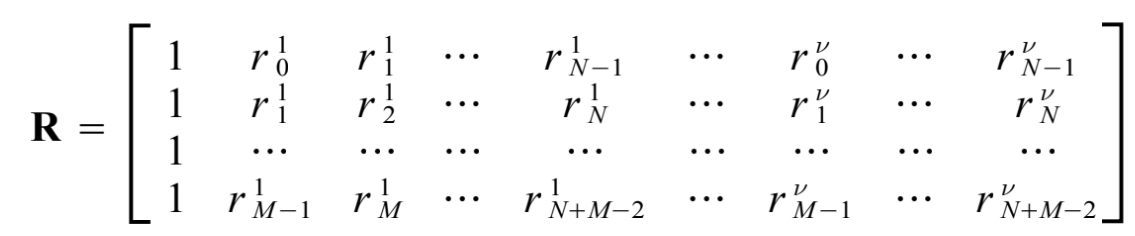




This is also referred to as the design or feature matrix, with each column being a predictor, or feature. The column of 1’s accounts for the intercept term in linear regression/decoding. Make sure you understand what this matrix means before moving on. 

We denote the target matrix (e.g. the $\textbf{M} \times 5$ matrix of finger angles) as the $\textbf{Y}$ and the reconstruction (e.g. the predicted finger angles) as $\hat{\textbf{Y}}$. Note that in Warland et al., 1997, this quantity is referred to as the stimulus vector since they are talking about decoding the stimulus from neural data after it. We, on the other hand, are trying to decode finger positions using the ECoG data before it, but we can conveniently use the same method.

Solving the minimum least-squares difference between the stimulus and reconstruction, $(\textbf{Y} - \hat{\textbf{Y}})^\text{T}(\textbf{Y} - \hat{\textbf{Y}})$, we get the analytic form for the optimal filter, $$ \text{f} = (\textbf{R}^\text{T}\textbf{R})^{-1}(\textbf{R}^\text{T}\textbf{Y})$$

This equation should take a familiar form. Warland et al., 1997 don’t refer to it as such, but this is exactly the same as linear regression, one of the most commonly used algorithms in practical machine learning. Not only is this algorithm remarkably powerful, but it has a beautiful analytic form for learning the “weights” (here, the $\text{f}$ matrix), a rarity in a field where almost all optimizations involve some sort of iterative algorithm. After learning the filter weights $\text{f}$, we can calculate the optimal predictions as: $$\hat{\textbf{Y}} = \textbf{R}\text{f}$$

## Dataset
The dataset for part 1 is stored within `final_proj_part1_data.pkl`. The `.pkl` file type is a pickle file, which stores python objects. You can open the `.pkl` file with this code. 
```
with open('final_proj_part1_data.pkl', 'rb') as f:
  proj_data = pickle.load(f)
```
This stores the data inside the file as a variable named proj_data. 

**NOTE: Python versions don't pickle with each other very well. This pickle file was made in Google Colab, running Python 3.7.12. If you are running your own installation of Python and cannot load the file, we recommend you either use Colab, or make a new environment with Python 3.7.12.**

There are 3 subjects, each with their own Data Glove data (the glove they used to capture hand movements), and ECoG data. The data is represented as a dictionary with keys `'data_glove'` and `'ecog'`, storing the data glove and ecog data, respectively. These keys map to python lists of 3 items. Each item is an np.ndarray corresponding to a subject's data. See the pseudcode below.

```
proj_data = {
  'data_glove':[np.ndarray for subject 1, np.ndarray for subject 2, np.ndarray for subject 3],
  'ecog':[np.ndarray for subject 1, np.ndarray for subject 2, np.ndarray for subject 3]
}
```

All np.ndarray shapes for `'data_glove'` should be (m x 5), where m is the number of samples in the signal, and 5 is the number of fingers. 

The np.ndarray shapes for `'ecog'` are (m x 61), (m x 46), and (m x 64), where m is the number of samples in the signal, and each subject had 61, 46, and 64 ecog channels, respectively. 

**The sampling rate of the data glove and ecog was 1000 Hz**

<!-- The dataset is also on IEEG 
* Subject 1
 * I521_Sub1_Training_ecog - Training ECoG \
 * I521_Sub1_Training_dg - Training Data Glove \
 * I521_Sub1_Leaderboard_ecog - Testing ECoG
* Subject 2
 * I521_Sub2_Training_ecog - Training ECoG \
 * I521_Sub2_Training_dg - Training Data Glove \
 * I521_Sub2_Leaderboard_ecog - Testing ECoG
* Subject 3
 * I521_Sub3_Training_ecog - Training ECoG \
 * I521_Sub3_Training_dg - Training Data Glove \
 * I521_Sub3_Leaderboard_ecog - Testing ECoG -->

Your task is to develop an algorithm to use the ECoG to predict finger movements that are captured by the Data Glove.

# 1. Getting Started (4 pts)
The following sections will walk you through the development of the prediction pipeline. 

In [1]:
#Set up the notebook environment
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import scipy
from scipy.stats import pearsonr
from scipy import signal as sig

## 1.
Extract the dataglove and ECoG data for each subject from the pickle file. Feel free to copy the code snippet above. Split the data into a training and testing set (at least 50% of the data should be in the training set). 

**How many samples are there in the full ECoG recording (before splitting)?** (1 pt)

**How many samples do you have in your training set? In your testing set?** (1 pt)

In [32]:
#Your code here
with open('final_proj_part1_data.pkl', 'rb') as f:
    proj_data = pickle.load(f)
    
ecog_1 = proj_data['ecog'][0]
ecog_2 = proj_data['ecog'][1]
ecog_3 = proj_data['ecog'][2]
    
data_glove_1 = proj_data['data_glove'][0]
data_glove_2 = proj_data['data_glove'][1]
data_glove_3 = proj_data['data_glove'][2]

# from sklearn.model_selection import train_test_split
# ecog_1_train, ecog_1_test, data_glove_1_train, data_glove_1_test = train_test_split(ecog_1, data_glove_1, test_size=0.3, random_state=42)
# ecog_2_train, ecog_2_test, data_glove_2_train, data_glove_2_test = train_test_split(ecog_2, data_glove_2, test_size=0.3, random_state=42)
# ecog_3_train, ecog_3_test, data_glove_3_train, data_glove_3_test = train_test_split(ecog_3, data_glove_3, test_size=0.3, random_state=42)

train_test_ratio = 0.7

ecog_1_train = ecog_1[:int(train_test_ratio * ecog_1.shape[0])]
ecog_1_test = ecog_1[int(train_test_ratio * ecog_1.shape[0]):]
data_glove_1_train = data_glove_1[:int(train_test_ratio * data_glove_1.shape[0])]
data_glove_1_test = data_glove_1[int(train_test_ratio * data_glove_1.shape[0]):]

ecog_2_train = ecog_2[:int(train_test_ratio * ecog_2.shape[0])]
ecog_2_test = ecog_2[int(train_test_ratio * ecog_2.shape[0]):]
data_glove_2_train = data_glove_2[:int(train_test_ratio * data_glove_2.shape[0])]
data_glove_2_test = data_glove_2[int(train_test_ratio * data_glove_2.shape[0]):]

ecog_3_train = ecog_3[:int(train_test_ratio * ecog_3.shape[0])]
ecog_3_test = ecog_3[int(train_test_ratio * ecog_3.shape[0]):]
data_glove_3_train = data_glove_3[:int(train_test_ratio * data_glove_3.shape[0])]
data_glove_3_test = data_glove_3[int(train_test_ratio * data_glove_3.shape[0]):]


print(f"""
Before splitting: {ecog_1.shape[0]} samples
After splitting: {ecog_1_train.shape[0]} training samples and {ecog_1_test.shape[0]} testing samples
""")


Before splitting: 300000 samples
After splitting: 210000 training samples and 90000 testing samples



## 2.
Next, complete the `filter_data` function. Test it using the raw data extracted in the prior step. What filter types and cutoff frequencies did you use? (2 pts)

In [3]:
def filter_data(raw_eeg, fs=1000):
    """
    Write a filter function to clean underlying data.
    Filter type and parameters are up to you. Points will be awarded for reasonable filter type, parameters and application.
    Please note there are many acceptable answers, but make sure you aren't throwing out crucial data or adversly
    distorting the underlying data!

    Input: 
        raw_eeg (samples x channels): the raw signal
        fs: the sampling rate (1000 for this dataset)
    Output: 
        clean_data (samples x channels): the filtered signal
    """
    dim = 100
    b = sig.firwin(numtaps=dim + 1, cutoff=[0.15, 200], pass_zero='bandpass', fs=fs)

    filtered_eeg = sig.filtfilt(b, 1, x=raw_eeg, axis=0)
    
    return filtered_eeg

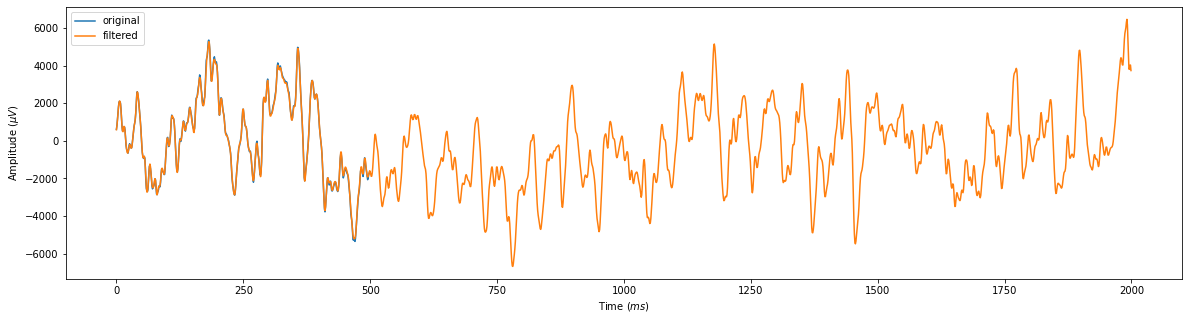

In [4]:
plt.figure(figsize=(20, 5))
plt.plot(ecog_1_train[:500, 0], label='original')
plt.plot(filter_data(ecog_1_train[:2000, 0]), label='filtered')
# plt.set_title('First HFO signal')
plt.ylabel('Amplitude ($\mu V$)')
plt.xlabel('Time ($ms$)')
plt.legend()

Here we used the bandpass filter mentioned in the paper. The cutoff frequencies are [0.15, 200] Hz.

# 2. Calculating Features (12 points)

Here you will complete the `get_windowed_feats` and `get_features` functions. 

## 1. 
We will calculate features across sliding time windows. if we use a suggested window length of 100ms with a 50ms window overlap, how many feature windows, $M$, will we have if we computed features using all the data in a given subject? Feel free to re-use code from previous homeworks. 

In [5]:
ecog_1_train.shape

(210000, 61)

In [6]:
def NumWins(x, fs, winLen, winDisp):
    return int(1 + (x.shape[0] - winLen * fs) / (winDisp * fs))

winLen = 100 / 1e3
winOverlap = 50 / 1e3
winDisp = winLen - winOverlap
NumWins(ecog_1, 1000, winLen, winDisp)

5999

## 2.
Now complete the `get_features` function. Please create **4 or more** different features to calculate for each channel in each time window. Features may include the average time-domain voltage, or the average frequency-domain magnitude in consecutive 15Hz frequency bands, bandpower of relevant frequency bands, etc...

In [40]:
def LineLength(x):
    return np.abs(np.diff(x, axis=0)).sum(axis=0)

def Area(x):
    return np.abs(x).sum(axis=0)

def Energy(x):
    return (x ** 2).sum(axis=0)

def ZeroCrossingMean(x):
    return ((x < x.mean(axis=0))[1:] & (x[:-1] > x.mean(axis=0)) | (x > x.mean(axis=0))[1:] & (x[:-1] < x.mean(axis=0))).sum(axis=0)

def numSpikes(x):
    #TODO: implement
    sig.find_peaks(x, height=0, distance=100)
    pass

def averageTimeDomain(x):
    #TODO: implement
    return np.mean(x, axis=0)

def averageFreqDomain(x):
    #TODO: implement
    fourier = np.fft.fft(x, axis=1)
    N = len(fourier)
    n = np.arange(N)
    T = N/1000
    freq = n/T 
    return [np.abs(fourier[(freq >= 8) & (freq <= 12)]).mean(axis=0), 
            np.abs(fourier[(freq >= 18) & (freq <= 24)]).mean(axis=0),
            np.abs(fourier[(freq >= 75) & (freq <= 115)]).mean(axis=0),
            np.abs(fourier[(freq >= 125) & (freq <= 159)]).mean(axis=0),
            np.abs(fourier[(freq >= 159) & (freq <= 175)]).mean(axis=0)]

def bandpower(x, fs, fmin, fmax):
    fs = 1000
    # win = 4 * sf
    freqs, psd = sig.welch(x, fs, axis=0, nperseg=x.shape[0])
    
    # Define delta lower and upper limits
    # fmin, fmax = 0.5, 4

    # Find intersecting values in frequency vector
    idx_delta = np.logical_and(freqs >= fmin, freqs <= fmax)
    
    from scipy.integrate import simps

    # Frequency resolution
    freq_res = freqs[1] - freqs[0]  # = 1 / 4 = 0.25

    # Compute the absolute power by approximating the area under the curve
    delta_power = simps(psd[idx_delta], dx=freq_res, axis=0)
    
    return delta_power
    

def get_features(filtered_window, fs=1000):
    """
        Write a function that calculates features for a given filtered window. 
        Feel free to use features you have seen before in this class, features that
        have been used in the literature, or design your own!

        Input: 
        filtered_window (window_samples x channels): the window of the filtered ecog signal 
        fs: sampling rate
        Output:
        features (channels x num_features): the features calculated on each channel for the window
    """
    feat_LL = LineLength(filtered_window)
    feat_Area = Area(filtered_window)
    feat_Energy = Energy(filtered_window)
    feat_ZCM = ZeroCrossingMean(filtered_window)
    feat_TimeAvg = averageTimeDomain(filtered_window)
    feat_FreqAvg = averageFreqDomain(filtered_window)
    
    
    return np.hstack([#feat_LL, feat_Area, feat_Energy, feat_ZCM, 
                    #   feat_Energy,
                      feat_TimeAvg, 
                      bandpower(filtered_window, 1000, 8, 12),
                      bandpower(filtered_window, 1000, 18, 24),
                      bandpower(filtered_window, 1000, 75, 115),
                      bandpower(filtered_window, 1000, 125, 159),
                      bandpower(filtered_window, 1000, 159, 175)])

In [8]:
get_features(filter_data(ecog_1_train[:2500, :])).shape

(366,)

## 3.
Now finish the `get_windowed_feats` function by putting the `filter_data` and `get_features` functions together to return a feature vector for each time window.

In [9]:
def get_windowed_feats(raw_ecog, fs, window_length, window_overlap):
    """
        Write a function which processes data through the steps of filtering and
        feature calculation and returns features. Points will be awarded for completing
        each step appropriately (note that if one of the functions you call within this script
        returns a bad output, you won't be double penalized). Note that you will need
        to run the filter_data and get_features functions within this function. 

        Inputs:
        raw_eeg (samples x channels): the raw signal
        fs: the sampling rate (1000 for this dataset)
        window_length: the window's length
        window_overlap: the window's overlap
        Output: 
        all_feats (num_windows x (channels x features)): the features for each channel for each time window
            note that this is a 2D array. 
    """
    raw_ecog = filter_data(raw_ecog, fs)
    
    window_disp = window_length - window_overlap
    
    all_feats = np.vstack([get_features(raw_ecog[int(i * window_disp * fs):int(i * window_disp * fs + window_length * fs), :], fs) for i in range(NumWins(raw_ecog, fs, window_length, window_overlap))])
    
    return all_feats

In [10]:
get_windowed_feats(ecog_1_train, 1000, winLen, winOverlap).shape

(4199, 366)

# 3. Creating the Response Matrix (6 points)
In this section, you will develop code for your *create_R_matrix* function

## 1.
For our set of 62 channels in subject 1, what would the dimensions of the R matrix be if we calculated 6 different feature types per channel, and N = 3 time bins where the number of total time bins M is the number you calculated in 2.1? (1pt)

In [11]:
print(f'The size should be (4199, 6*3*62) = (4199, {6*3*62})')

The size should be (4199, 6*3*62) = (4199, 1116)


## 2. 
We do not have feature data to fill out the first N-1 data rows in the R matrix that will be used to predict the first N-1 finger angles. One way to work around this is to append a copy of the first N-1 rows of your feature matrix to the beginning of your feature matrix before calculating R. Make this adjustment in `create_R_matrix`, then compute the response matrix R. You can test whether your function is running correctly by running `create_R_matrix` with data from `testRfunction.pkl` using 3 windows and verifying that the quantity `np.mean(R)` is 25.4668 (5 points).

In [12]:
def create_R_matrix(features, N_wind):
    """ 
    Write a function to calculate the R matrix

    Input:
        features (samples (number of windows in the signal) x channels x features): 
        the features you calculated using get_windowed_feats
        N_wind: number of windows to use in the R matrix

    Output:
        R (samples x (N_wind*channels*features))
    """
    num_win = features.shape[0]
    num_channel_features = features.shape[1]
    
    # Append a copy of the first N-1 rows to the beginning of features
    features = np.vstack((features[:N_wind-1], features))
    
    R = np.zeros((num_win, N_wind * num_channel_features))
    
    for i in range(num_win):
        # Get the feature matrix for the current window
        # Resize the feature matrix and store in R
        R[i,:] = features[i:i+N_wind,:].reshape(-1)

    R = np.hstack((np.ones((R.shape[0], 1)), R))

    return R
    

In [13]:
# Load the test data from the pickle file
with open('testRfunction.pkl', 'rb') as f:
    test_data = pickle.load(f)

# Test the create_R_matrix function with 3 windows
R = create_R_matrix(test_data, 3)

# Check that np.mean(R) is 25.4668
print(np.mean(R))

25.46678519830894


# 4. ML Training and Testing (10 points)
Here we will use the optimal linear decoder framework to predict finger angles, and additionally you will use one or more classifiers of your own choosing to make the prediction.

In [47]:
# Compute the R matrix for the training data
feature_train = get_windowed_feats(ecog_1_train, 1000, winLen, winOverlap)
R_train = create_R_matrix(feature_train, 3)

feature_test = get_windowed_feats(ecog_1_test, 1000, winLen, winOverlap)
R_test = create_R_matrix(feature_test, 3)

# Downsample the glove data
Y_train = data_glove_1_train
Y_test = data_glove_1_test
Y_train = sig.resample(Y_train, R_train.shape[0], axis=0)
Y_test = sig.resample(Y_test, R_test.shape[0], axis=0)

label_train = Y_train.argmax(axis=1)
label_test = Y_test.argmax(axis=1)

## 1. 

Calculate the linear filter $\text{f}$ as defined above for all 5 finger angles using features calculated from your training data. You will have to first down-sample the finger flexion data so that your feature matrix, $\textbf{R}$, and your flexion data have the same number of time windows.

You will likely find [np.matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html), and [np.linalg.inv](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) to be useful. 

In [48]:
# Compute the weights
f_train = np.linalg.pinv(R_train.T @ R_train) @ (R_train.T @ Y_train)

prediction_LR = (R_test @ f_train).argmax(axis=1)

## 2.
Try one other machine learning classifier using your features and finger angle labels. Look back through previous homeworks to get some ideas

In [49]:
# # import and Do PCA
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled_R_train = scaler.fit_transform(R_train)
# scaled_R_test = scaler.transform(R_test)


# from sklearn.decomposition import PCA
# pca = PCA(n_components=500)
# R_train_pca = pca.fit_transform(scaled_R_train)
# R_test_pca = pca.transform(scaled_R_test)
# print(pca.explained_variance_ratio_.sum())

from sklearn.ensemble import RandomForestClassifier

rf_reg = RandomForestClassifier(n_estimators=100, max_depth=5, max_leaf_nodes=200, random_state=0)

rf_reg.fit(R_train, label_train)

prediction_RF = rf_reg.predict(R_test)

rf_reg.score(R_test, label_test)
# rf_reg.score(R_train, label_train)

0.2979433018343524

## 3. 
Produce predictions on the testing set for each finger angle. Calculate the correlation coefficient between the predicted and test finger angles for each finger separately. Report you correlations here using the lineare filter, and when using the other classifier(s) that you tried. 

You will find  [pearsonr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) to be helpful and already imported. 

In [50]:
print('For Subject 1')
print(f'For linear regression: {pearsonr(prediction_LR, label_test)}')
print(f'For random forest: {pearsonr(prediction_RF, label_test)}')

For Subject 1
For linear regression: PearsonRResult(statistic=0.30711897117205395, pvalue=1.3364722165931922e-40)
For random forest: PearsonRResult(statistic=0.30715406609099494, pvalue=1.3080444752526713e-40)


In [51]:
# Compute the R matrix for the training data
feature_train = get_windowed_feats(ecog_2_train, 1000, winLen, winOverlap)
R_train = create_R_matrix(feature_train, 3)

feature_test = get_windowed_feats(ecog_2_test, 1000, winLen, winOverlap)
R_test = create_R_matrix(feature_test, 3)

# Downsample the glove data
Y_train = data_glove_2_train
Y_test = data_glove_2_test
Y_train = sig.resample(Y_train, R_train.shape[0], axis=0)
Y_test = sig.resample(Y_test, R_test.shape[0], axis=0)

label_train = Y_train.argmax(axis=1)
label_test = Y_test.argmax(axis=1)

# Compute the weights
f_train = np.linalg.pinv(R_train.T @ R_train) @ (R_train.T @ Y_train)
prediction_LR = (R_test @ f_train).argmax(axis=1)

from sklearn.ensemble import RandomForestClassifier
rf_reg = RandomForestClassifier(n_estimators=100, max_depth=5, max_leaf_nodes=200)
rf_reg.fit(R_train, label_train)
prediction_RF = rf_reg.predict(R_test)

print('For Subject 2')
print(f'For linear regression: {pearsonr(prediction_LR, label_test)}')
print(f'For random forest: {pearsonr(prediction_RF, label_test)}')

For Subject 2
For linear regression: PearsonRResult(statistic=0.13883328455263702, pvalue=3.356777443180397e-09)
For random forest: PearsonRResult(statistic=0.021336677273699915, pvalue=0.3657510022077947)


In [53]:
# Compute the R matrix for the training data
feature_train = get_windowed_feats(ecog_3_train, 1000, winLen, winOverlap)
R_train = create_R_matrix(feature_train, 3)

feature_test = get_windowed_feats(ecog_3_test, 1000, winLen, winOverlap)
R_test = create_R_matrix(feature_test, 3)

# Downsample the glove data
Y_train = data_glove_3_train
Y_test = data_glove_3_test
Y_train = sig.resample(Y_train, R_train.shape[0], axis=0)
Y_test = sig.resample(Y_test, R_test.shape[0], axis=0)

label_train = Y_train.argmax(axis=1)
label_test = Y_test.argmax(axis=1)

# Compute the weights
f_train = np.linalg.pinv(R_train.T @ R_train) @ (R_train.T @ Y_train)
prediction_LR = (R_test @ f_train).argmax(axis=1)

from sklearn.ensemble import RandomForestClassifier
rf_reg = RandomForestClassifier(n_estimators=100, max_depth=5, max_leaf_nodes=200, random_state=0)
rf_reg.fit(R_train, label_train)
prediction_RF = rf_reg.predict(R_test)

print('For Subject 3')
print(f'For linear regression: {pearsonr(prediction_LR, label_test)}')
print(f'For random forest: {pearsonr(prediction_RF, label_test)}')

For Subject 3
For linear regression: PearsonRResult(statistic=0.25134086350633644, pvalue=2.5534309041997736e-27)
For random forest: PearsonRResult(statistic=0.26711309807786315, pvalue=9.123279077326177e-31)
